In [0]:
#Importando librerias
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import nltk
import random
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



In [0]:
#Importando los datos
path='base_terrorismo.csv'
terror=pd.read_csv(path,encoding='latin',error_bad_lines=False)
terror.head()

## **ENTENDIENDO EL NEGOCIO**


In [0]:
terror2=terror.loc[:,['iyear','imonth','iday','extended','country_txt','region_txt','provstate','city','latitude','longitude','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1','taget1','natlty1','gname','motive','guncertain1','nperps','weaptype1_txt','nkill']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



In [0]:
terror2.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1,taget1,natlty1,gname,motive,guncertain1,nperps,weaptype1_txt,nkill
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,68.0,NaN,58.0,MANO-D,NaN,0.0,NaN,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),45.0,NaN,21.0,23rd of September Communist League,NaN,0.0,7.0,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,54.0,NaN,217.0,Unknown,NaN,0.0,NaN,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),46.0,NaN,217.0,Unknown,NaN,0.0,NaN,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),46.0,NaN,217.0,Unknown,NaN,0.0,NaN,Incendiary,NaN


In [0]:
len(terror2.columns.to_list())

23

In [0]:
terror2.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','target1':'target','nkill':'killed','nwound':'wounded','summary':'summary','gname':'group','targtype1_txt':'target_type','weaptype1_txt':'weapon_type','motive':'motive'},inplace=True)


In [0]:
terror2

,year,month,day,extended,country,region,provstate,city,latitude,longitude,success,suicide,attacktype,target_type,targsubtype1,taget1,natlty1,group,motive,guncertain1,nperps,weapon_type,killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,68.0,NaN,58.0,MANO-D,NaN,0.0,NaN,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),45.0,NaN,21.0,23rd of September Communist League,NaN,0.0,7.0,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,54.0,NaN,217.0,Unknown,NaN,0.0,NaN,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),46.0,NaN,217.0,Unknown,NaN,0.0,NaN,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),46.0,NaN,217.0,Unknown,NaN,0.0,NaN,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,1,0,Armed Assault,Military,36.0,NaN,182.0,Al-Shabaab,NaN,0.0,-99.0,Firearms,1.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1,0,Bombing/Explosion,Military,27.0,NaN,167.0,Muslim extremists,NaN,0.0,-99.0,Explosives,2.0
181688,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,1,0,Facility/Infrastructure Attack,Private Citizens & Property,76.0,NaN,160.0,Bangsamoro Islamic Freedom Movement (BIFM),NaN,0.0,-99.0,Incendiary,0.0
181689,2017,12,31,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,Bombing/Explosion,Government (General),21.0,NaN,92.0,Unknown,NaN,0.0,-99.0,Explosives,0.0


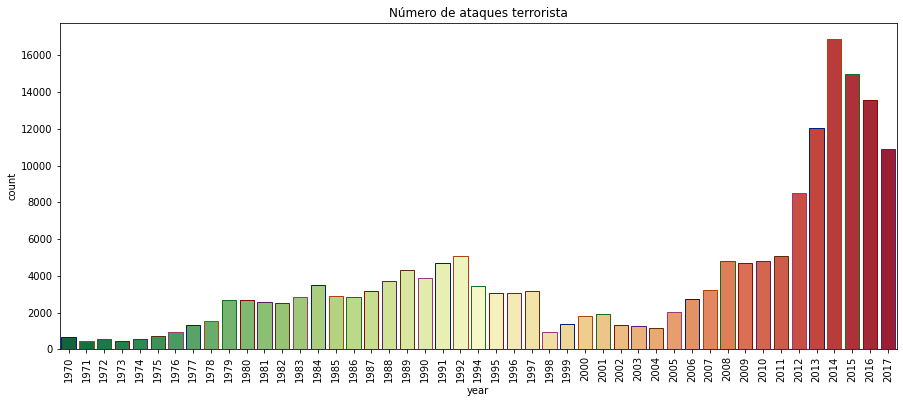

In [0]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=terror2,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Número de ataques terrorista')
plt.show()

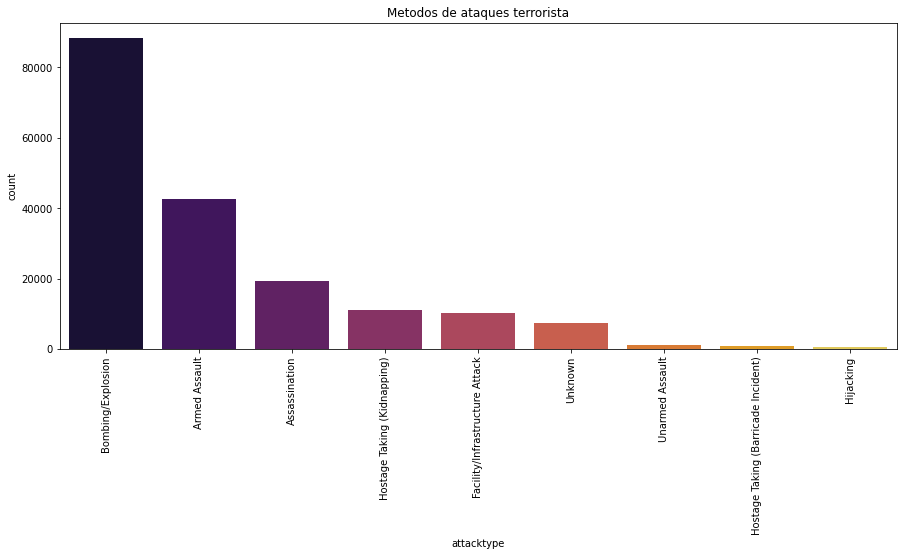

In [0]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype',data=terror2,palette='inferno',order=terror2['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Metodos de ataques terrorista')
plt.show()

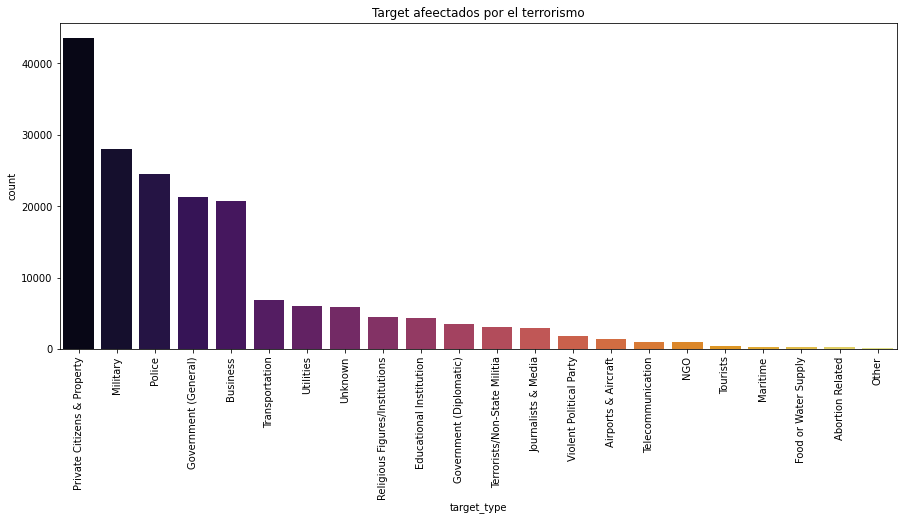

In [0]:
plt.subplots(figsize=(15,6))
sns.countplot(terror2['target_type'],palette='inferno',order=terror2['target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target afeectados por el terrorismo')
plt.show()

In [0]:
terror2.columns.to_list()

['year',
 'month',
 'day',
 'extended',
 'country',
 'region',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'success',
 'suicide',
 'attacktype',
 'target_type',
 'targsubtype1',
 'taget1',
 'natlty1',
 'group',
 'motive',
 'guncertain1',
 'nperps',
 'weapon_type',
 'killed']

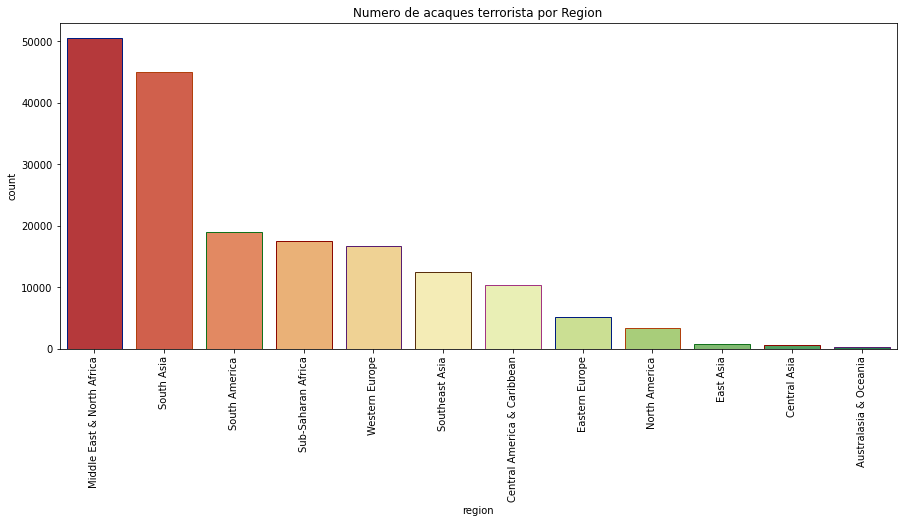

In [0]:
plt.subplots(figsize=(15,6))
sns.countplot('region',data=terror2,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror2['region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Numero de acaques terrorista por Region')
plt.show()

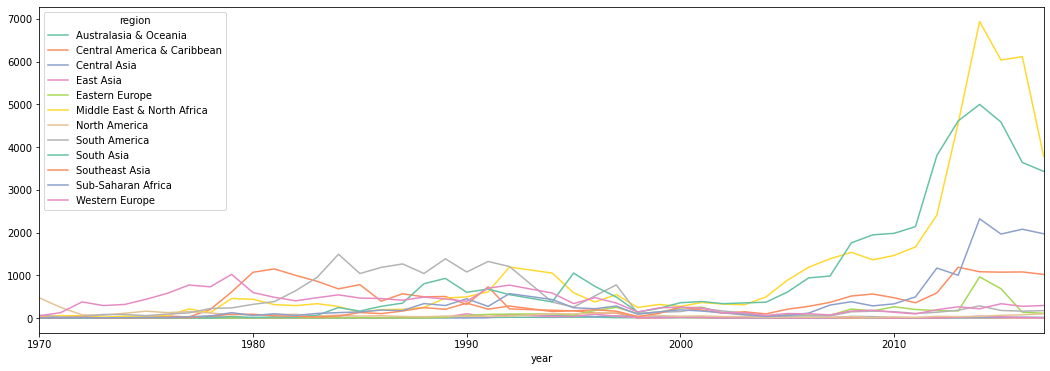

In [0]:
terror_region=pd.crosstab(terror2.year,terror2.region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

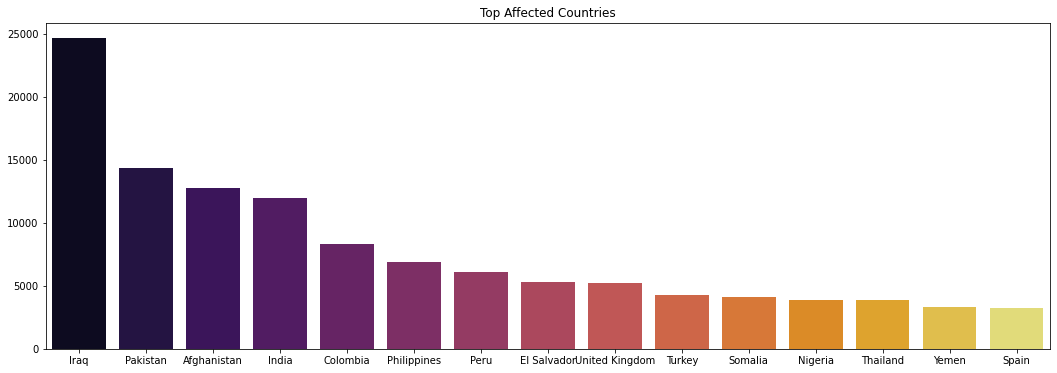

In [0]:
plt.subplots(figsize=(18,6))
sns.barplot(terror2['country'].value_counts()[:15].index,terror2['country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

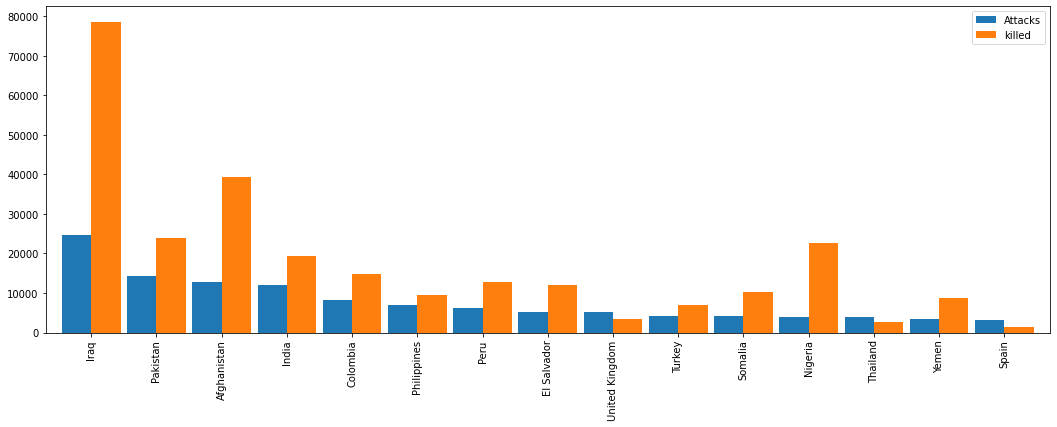

In [0]:
coun_terror=terror2['country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror2.groupby('country')['killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## **ENTENDIENDO LOS DATOS**

In [0]:
path="base_terrorismo_codificada.csv"
terror2=pd.read_csv(path,encoding='latin',error_bad_lines=False)
terror.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,nperps,weaptype1,weaptype1_txt,weapdetail,nkill
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13,Unknown,NaN,1.0
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,13,Unknown,NaN,0.0
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13,Unknown,NaN,1.0
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6,Explosives,Explosive,NaN
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,8,Incendiary,Incendiary,NaN


In [0]:
terror2=terror.loc[:,['iyear','imonth','iday','extended','country','region','latitude','longitude','success','suicide','attacktype1','targtype1','target1','natlty1','gname','motive','guncertain1','nperps','weaptype1','nkill']]

In [0]:
terror2.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
latitude         4556
longitude        4557
success             0
suicide             0
attacktype1         0
targtype1           0
target1           636
natlty1          1559
gname               0
motive         131130
guncertain1       380
nperps          71115
weaptype1           0
nkill           10313
dtype: int64

In [0]:
terror2.dtypes

iyear            int64
imonth           int64
iday             int64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
success          int64
suicide          int64
attacktype1      int64
targtype1        int64
target1         object
natlty1        float64
gname           object
motive          object
guncertain1    float64
nperps         float64
weaptype1        int64
nkill          float64
dtype: object

In [0]:
terror2.replace({' ':np.nan},inplace=True)

In [0]:
terror2.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
latitude         4556
longitude        4557
success             0
suicide             0
attacktype1         0
targtype1           0
target1           636
natlty1          1559
gname               0
motive         131130
guncertain1       380
nperps          71115
weaptype1           0
nkill           10313
dtype: int64

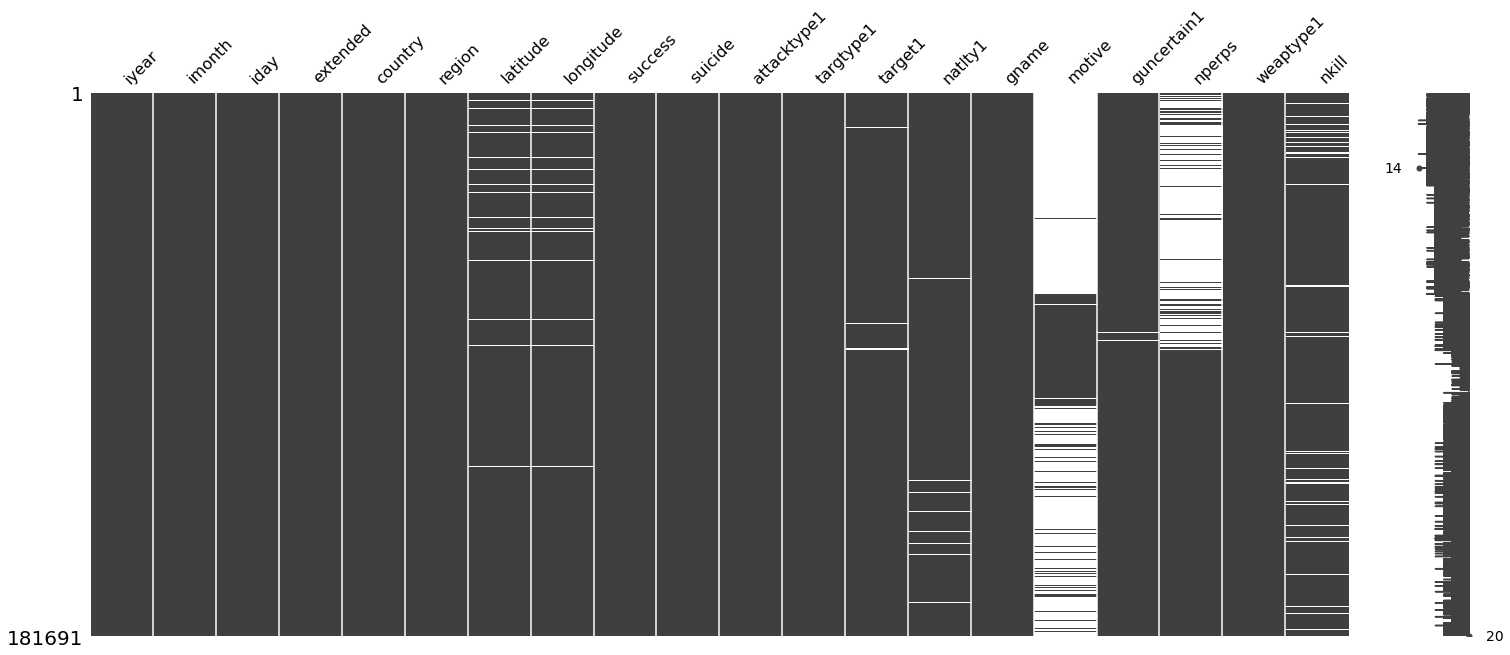

In [0]:
msno.matrix(terror2)

In [0]:
terror2.head()

,iyear,imonth,iday,extended,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,target1,natlty1,gname,motive,guncertain1,nperps,weaptype1,nkill
0,1970,7,2,0,58,2,18.456792,-69.951164,1,0,1,14,Julio Guzman,58.0,MANO-D,NaN,0.0,NaN,13,1.0
1,1970,0,0,0,130,1,19.371887,-99.086624,1,0,6,7,"Nadine Chaval, daughter",21.0,23rd of September Communist League,NaN,0.0,7.0,13,0.0
2,1970,1,0,0,160,5,15.478598,120.599741,1,0,1,10,Employee,217.0,Unknown,NaN,0.0,NaN,13,1.0
3,1970,1,0,0,78,8,37.997490,23.762728,1,0,3,7,U.S. Embassy,217.0,Unknown,NaN,0.0,NaN,6,NaN
4,1970,1,0,0,101,4,33.580412,130.396361,1,0,7,7,U.S. Consulate,217.0,Unknown,NaN,0.0,NaN,8,NaN


Analizando FALTANTES


In [0]:
terror2['target1']

0                    Julio Guzman
1         Nadine Chaval, daughter
2                        Employee
3                    U.S. Embassy
4                  U.S. Consulate
                   ...           
181686                 Checkpoint
181687           Hmeymim Air Base
181688                     Houses
181689                     Office
181690                    Unknown
Name: target1, Length: 181691, dtype: object

In [0]:
statistics.mode(terror2['target1'])

'Civilians'

In [0]:
terror2['target1'].replace({np.nan:'Civilians'},inplace=True)

In [0]:
statistics.mode(terror2['natlty1'])

95.0

In [0]:
terror2['natlty1'].replace({np.nan:95.0},inplace=True)

In [0]:
statistics.mode(terror2['gname'])

'Unknown'

In [0]:
terror2['gname'].replace({np.nan,'Unknown'},inplace=True)

In [0]:
terror2.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
latitude         4556
longitude        4557
success             0
suicide             0
attacktype1         0
targtype1           0
target1             0
natlty1             0
gname               0
motive         131130
guncertain1       380
nperps          71115
weaptype1           0
nkill           10313
dtype: int64

In [0]:
statistics.mean(terror2['nkill'])

nan

In [0]:
terror2['nkill'].replace({np.nan:2.0},inplace=True)

In [0]:
terror2['nperps'].replace({np.nan:770},inplace=True)

In [0]:
terror2['guncertain1'].replace({np.nan:0},inplace=True)

In [0]:
terror2['motive'].replace({np.nan:'Unknown'},inplace=True)

In [0]:
terror2.isnull().sum()

iyear             0
imonth            0
iday              0
extended          0
country           0
region            0
latitude       4556
longitude      4557
success           0
suicide           0
attacktype1       0
targtype1         0
target1           0
natlty1           0
gname             0
motive            0
guncertain1       0
nperps            0
weaptype1         0
nkill             0
dtype: int64

In [0]:
terror2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
iyear          181691 non-null int64
imonth         181691 non-null int64
iday           181691 non-null int64
extended       181691 non-null int64
country        181691 non-null int64
region         181691 non-null int64
latitude       177135 non-null float64
longitude      177134 non-null float64
success        181691 non-null int64
suicide        181691 non-null int64
attacktype1    181691 non-null int64
targtype1      181691 non-null int64
target1        181691 non-null object
natlty1        181691 non-null float64
gname          181691 non-null object
motive         181691 non-null object
guncertain1    181691 non-null float64
nperps         181691 non-null float64
weaptype1      181691 non-null int64
nkill          181691 non-null float64
dtypes: float64(6), int64(11), object(3)
memory usage: 27.7+ MB


In [0]:
statistics.mean(terror['iyear'])

2002.6389969783863

In [0]:
statistics.mode(terror['iyear'])

2014

In [0]:
max(terror['iyear'])

2017

In [0]:
statistics.mode(terror['imonth'])

5

In [0]:
statistics.mode(terror['region_txt'])

'Middle East & North Africa'

In [0]:
statistics.mode(terror['success'])

1

In [0]:
statistics.mode(terror['suicide'])

0

In [0]:
statistics.mode(terror['attacktype1_txt'])

'Bombing/Explosion'

In [0]:
statistics.mode(terror['targtype1_txt'])

'Private Citizens & Property'

In [0]:
statistics.mode(terror['natlty1_txt'])

'Iraq'

In [0]:
max(terror['natlty1'])

1004.0

In [0]:
statistics.mode(terror['guncertain1'])

0.0

In [0]:
max(terror['guncertain1'])

1.0

In [0]:
statistics.mode(terror['weaptype1_txt'])

'Explosives'

In [0]:
max(terror['weaptype1'])

13

In [0]:
statistics.mean(terror2['nkill'])

2.3803820772630453

In [0]:
max(terror2['nkill'])

1570.0

In [0]:
statistics.mean(terror2['nperps'])

261.6044548161439

In [0]:
max(terror2['nperps'])

25000.0

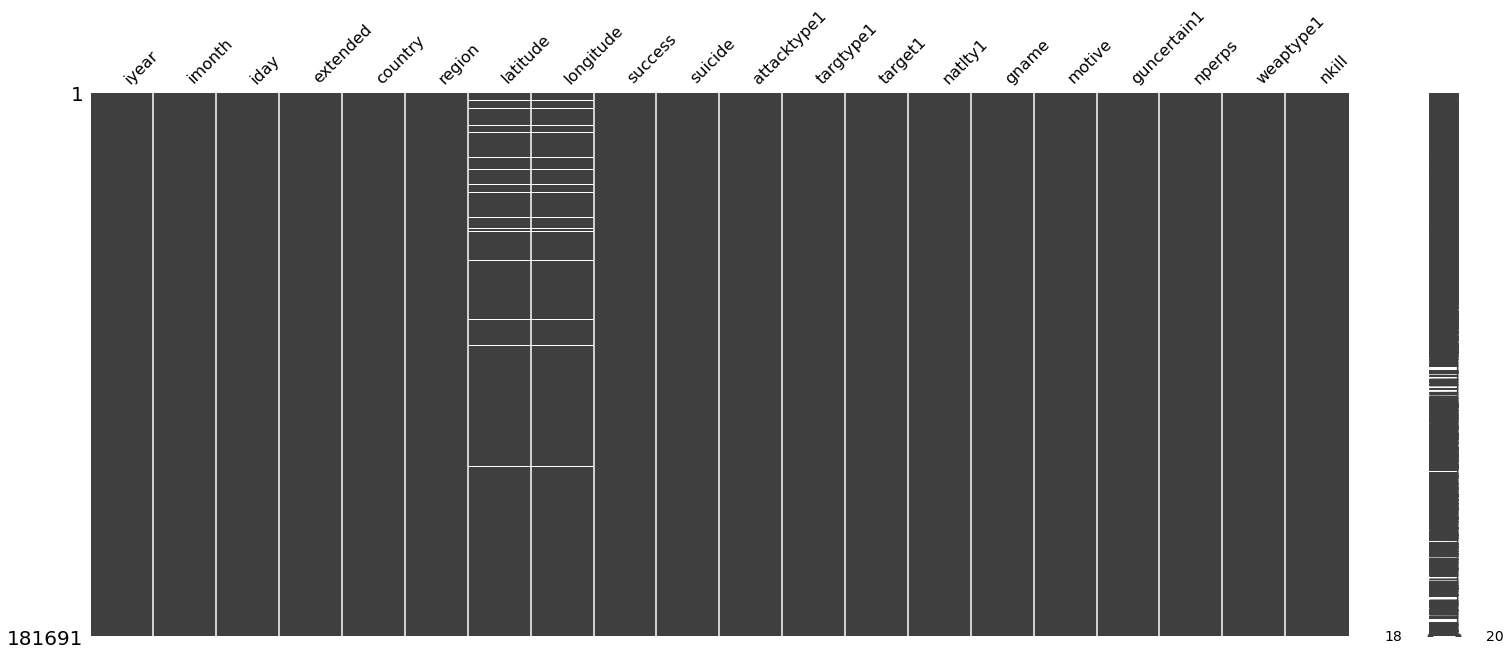

In [0]:
msno.matrix(terror2)

# **Modelando**

In [0]:
terror2.isna().sum()

iyear             0
imonth            0
iday              0
extended          0
country           0
region            0
latitude       4556
longitude      4557
success           0
suicide           0
attacktype1       0
targtype1         0
target1           0
natlty1           0
gname             0
motive            0
guncertain1       0
nperps            0
weaptype1         0
nkill             0
dtype: int64

In [0]:
terror2.dropna(inplace=True)

In [0]:
var_cont = list(terror2.describe().columns)
var_disc = [v for v in terror2.columns if v not in var_cont]

In [0]:
X = terror2[var_cont].copy()

In [0]:
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=var_cont)

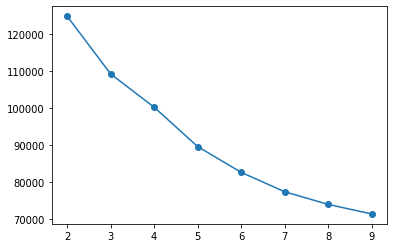

In [0]:
lst_in = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_in.append(cl.inertia_)
plt.plot(range(2,10),lst_in,marker='o')

In [0]:
cl = GaussianMixture(n_components=5)

In [0]:
cl.fit(Xs)
terror2['cl'] = cl.predict(Xs)

In [0]:
terror2.groupby('cl').mean()

,iyear,imonth,iday,extended,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,natlty1,guncertain1,nperps,weaptype1,nkill
cl,,,,,,,,,,,,,,,,,
0,2006.783323,6.447351,15.448119,0.000000,110.614303,7.716707,21.521660,39.040151,1.0,0.307801,2.720369,8.087580,154.313412,0.510778,170.348019,5.720369,7.237229
1,2007.708661,6.599738,15.765748,0.225722,240.156824,8.764436,21.555515,32.813151,1.0,0.219816,4.534777,9.059055,245.515092,0.101050,159.149606,7.666667,53.932415
2,2001.580656,6.465036,15.491862,0.000000,131.035291,7.056818,23.334850,-654.052368,1.0,0.000000,3.144949,8.260907,120.727479,0.000000,290.147461,6.323772,1.416108
3,2006.079085,6.480419,15.397957,0.634875,144.086344,7.333980,21.875263,33.128234,1.0,0.000000,5.311023,8.592927,144.115378,0.381499,168.110398,8.350523,1.329001
4,2005.882932,6.493039,15.797589,0.002118,144.144406,7.416625,27.354102,35.934611,0.0,0.053465,2.984213,9.570766,128.437758,0.062443,145.804751,6.497781,0.728589


In [0]:
terror2.mean().T.to_frame().T

,iyear,imonth,iday,extended,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,natlty1,guncertain1,nperps,weaptype1,nkill,cl
0,2002.91315,6.468668,15.517975,0.044644,132.362212,7.193402,23.498444,-458.695653,0.888073,0.037299,3.243211,8.420021,127.439069,0.082203,253.249754,6.432684,2.341628,2.090948


In [0]:
terror2['n'] = 1

In [0]:
aux = terror2[['cl','attacktype1','n']].copy()

aux = aux.pivot_table(index='attacktype1',columns='cl',aggfunc='sum',values='n')

In [0]:
for c in range(5):
    aux[c]/=aux[c].sum()

In [0]:
aux.sort_values(4).tail(20)

cl,0,1,2,3,4
attacktype1,,,,,
5,NaN,0.053150,0.005921,0.010213,0.000404
4,0.000059,0.010499,0.002811,0.015108,0.003833
8,NaN,0.006562,0.006000,0.007849,0.006103
6,NaN,0.171260,0.025023,0.589804,0.012307
7,NaN,0.022966,0.065479,0.106431,0.028952
9,NaN,0.203412,0.037424,0.051992,0.063149
2,0.279691,0.287402,0.257065,0.082799,0.116211
1,NaN,0.076772,0.102084,0.094024,0.233179
3,0.720250,0.167979,0.498193,0.041779,0.535862


In [0]:
aux = terror2[['cl','iyear','n']].copy()

aux = aux.pivot_table(index='iyear',columns='cl',aggfunc='sum',values='n')

In [0]:
for c in range(5):
    aux[c]/=aux[c].sum()

In [0]:
aux.sort_values(4).tail(20).to_csv('REGIONES.csv')

In [0]:
aux = terror2[['cl','region','n']].copy()

aux = aux.pivot_table(index='region',columns='cl',aggfunc='sum',values='n')

In [0]:
for c in range(5):
    aux[c]/=aux[c].sum()

In [0]:
aux.sort_values(0).tail(20)

cl,0,1,2,3,4
region,,,,,
12,0.000413,NaN,0.001732,0.001013,0.001866
4,0.001772,0.005249,0.004756,0.002532,0.006154
7,0.002421,0.001312,0.003197,0.003545,0.002875
1,0.002598,0.009186,0.020370,0.020679,0.028246
9,0.018189,0.055774,0.028763,0.030891,0.035559
2,0.024863,0.032808,0.065101,0.021016,0.017956
8,0.031949,0.009186,0.099880,0.066678,0.123676
5,0.059115,0.017060,0.068896,0.071995,0.066377
3,0.080730,0.026247,0.111541,0.102465,0.066731


In [0]:
path='base_terrorismo_unos.csv'
terror=pd.read_csv(path,encoding='latin',error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
terror.groupby(['gname']).sum()['unos'].sort_values().tail(20)

gname
Al-Qaida in the Arabian Peninsula (AQAP)             1020
Houthi extremists (Ansar Allah)                      1062
Palestinians                                         1125
Tehrik-i-Taliban Pakistan (TTP)                      1351
National Liberation Army of Colombia (ELN)           1561
Liberation Tigers of Tamil Eelam (LTTE)              1606
Maoists                                              1630
Communist Party of India - Maoist (CPI-Maoist)       1878
Basque Fatherland and Freedom (ETA)                  2024
Kurdistan Workers' Party (PKK)                       2310
Boko Haram                                           2418
Revolutionary Armed Forces of Colombia (FARC)        2487
Irish Republican Army (IRA)                          2671
New People's Army (NPA)                              2772
Al-Shabaab                                           3288
Farabundo Marti National Liberation Front (FMLN)     3351
Shining Path (SL)                                    4555
Islamic 

In [0]:
terror.groupby(['gname']).count()['iyear'].sort_values().tail(20)

gname
Al-Qaida in the Arabian Peninsula (AQAP)             1020
Houthi extremists (Ansar Allah)                      1062
Palestinians                                         1125
Tehrik-i-Taliban Pakistan (TTP)                      1351
National Liberation Army of Colombia (ELN)           1561
Liberation Tigers of Tamil Eelam (LTTE)              1606
Maoists                                              1630
Communist Party of India - Maoist (CPI-Maoist)       1878
Basque Fatherland and Freedom (ETA)                  2024
Kurdistan Workers' Party (PKK)                       2310
Boko Haram                                           2418
Revolutionary Armed Forces of Colombia (FARC)        2487
Irish Republican Army (IRA)                          2671
New People's Army (NPA)                              2772
Al-Shabaab                                           3288
Farabundo Marti National Liberation Front (FMLN)     3351
Shining Path (SL)                                    4555
Islamic 

In [0]:
path='Libro1.csv'
terror123=pd.read_csv(path,encoding='latin',error_bad_lines=False)

In [0]:
terror123.shape

(190, 5)

In [0]:
reglas=terror123.dropna()

In [0]:
reglas

,rhs,lhs,support,confidence,lift
0,"('Corsican National Liberation Front (FLNC)',)","('France', 'Bombing/Explosion')",0.003269,0.929577,80.734158
1,"('Nicaraguan Democratic Force (FDN)',)","('nan', 'Armed Assault')",0.004007,0.813408,4.853812
2,"(""New People's Army (NPA)"",)","('Philippines', 'nan')",0.010633,0.696970,27.807009
3,"('Basque Fatherland and Freedom (ETA)',)","('Spain', 'Bombing/Explosion')",0.006456,0.579545,55.361826
4,"('Liberation Tigers of Tamil Eelam (LTTE)',)","('Sri Lanka', 'nan')",0.005009,0.566625,48.699475
...,...,...,...,...,...
185,"('Military',)","('nan', 'Nicaraguan Democratic Force (FDN)')",0.003181,0.020655,4.193034
186,"('Armed Assault',)","('Nicaragua', 'Military')",0.004832,0.020577,3.818852
187,"('Armed Assault',)","('Nicaragua', 'Military', 'nan')",0.004832,0.020577,3.822756
188,"('Military',)","('Nicaragua', 'Nicaraguan Democratic Force (FD...",0.003137,0.020369,4.177003
